In [141]:
#importing the neccessary modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [142]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()#mnist is the dataset available in keras for digit recogonization 

Text(0.5, 0, '5')

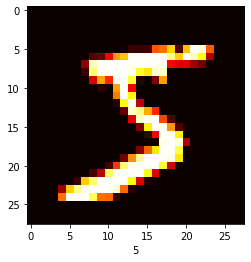

In [143]:
plt.imshow(x_train[0],cmap="hot")#cmap is used to view image with different colours 
plt.xlabel(str(y_train[0]))

In [144]:
#x_train.shape 

In [145]:
#x_test.shape

In [146]:
#x_train[0]

In [147]:
#normalizing our data
x_train=np.reshape(x_train,(60000,28*28))#make it as a one dimensional vector
x_test=np.reshape(x_test,(10000,28*28))
x_train=x_train/255#if you run the above cell you get to know that all the values lies between 0-255 for each traing eg. So,in order to make the values to range between 0-1 we divide it by 255
x_test=x_test/255

In [148]:
#creating our model
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(32,activation="relu",input_shape=(784,)),#first hidden layer
    tf.keras.layers.Dense(32,activation="relu"),#second hidden layer
    tf.keras.layers.Dense(10,activation="softmax")#output layer
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [149]:
#train our model
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 12s 195us/sample - loss: 0.3545 - acc: 0.8935
Epoch 2/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1687 - acc: 0.9497
Epoch 3/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1316 - acc: 0.9603
Epoch 4/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1101 - acc: 0.9663
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0959 - acc: 0.9706
Epoch 6/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0840 - acc: 0.9742
Epoch 7/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0760 - acc: 0.9759
Epoch 8/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0687 - acc: 0.9782
Epoch 9/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0626 - acc: 0.9802
Epoch 10/10
60000/60000 [==============================] - 7s 114us/sample -

In [150]:
model.save("digit_detection.model")

In [151]:
newmodel=tf.keras.models.load_model("digit_detection.model")

In [152]:
predictions=newmodel.predict([x_test])

In [153]:
print(predictions)

[[1.3872060e-06 2.2429056e-09 2.6042280e-06 ... 9.9995935e-01
  3.1578983e-07 1.2410542e-05]
 [2.5989695e-07 4.0886633e-07 9.9999464e-01 ... 5.4402538e-10
  2.6533060e-06 1.9538722e-12]
 [1.2024247e-05 9.9112773e-01 2.1913701e-03 ... 3.2299631e-03
  3.0903094e-03 3.1213338e-05]
 ...
 [2.1842674e-15 4.7356036e-11 1.5214850e-12 ... 7.7875901e-09
  4.5027569e-08 1.9068611e-05]
 [2.2059186e-09 1.7977002e-13 5.3443514e-11 ... 1.8274127e-07
  1.7505676e-05 2.1796042e-12]
 [1.8170441e-09 5.6224370e-14 5.3261874e-12 ... 3.1556085e-15
  2.8254745e-13 3.3313362e-14]]


In [154]:
np.argmax(predictions[0])#prediction of the first test sample

7

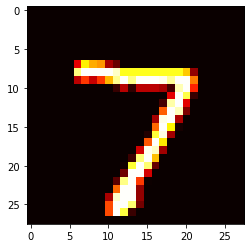

In [155]:
#checking whether our test sample is sample as the above prediction
image=x_test[0]
image=np.reshape(image,(28,28))#reshaping our one dimensional vector back to original dimensional
plt.imshow(image,cmap="hot")